# 1.0 Classification Problem using decision tree classifier

##1.1 Dataset description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

<center>
  <figure>
    <img width="500" src="https://cdn.britannica.com/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg">
  </figure>
  <figcaption>Fig.1 - Prima indian</figcaption>
</center>


###1.1.1 Glucose Tolerance Test

It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.

**Normal Results for Diabetes**: Two-hour glucose level less than 140 mg/dL

**Impaired Results for Diabetes** Two-hour glucose level 140 to 200 mg/dL

**Abnormal (Diagnostic) Results for Diabetes** Two-hour glucose level greater than 200 mg/dL


###1.1.2 Blood Pressure

The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

**Normal**: Systolic below 120 and diastolic below 80

**Elevated**: Systolic 120–129 and diastolic under 80

**Hypertension stage 1**: Systolic 130–139 and diastolic 80–89

**Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more

**Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.


###1.1.3 BMI (Body Mass Index)

<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.4/MathJax.js?config=default'></script>

The BMI value is found by: 
$$ {BMI = weight/height²} $$

The standard weight status categories associated with BMI ranges for adults are shown below.

**Below 18.5**: Underweight

**18.5 – 24.9**: Normal or Healthy Weight

**25.0 – 29.9**: Overweight

**30.0 and Above**: Obese


###1.1.4 Triceps Skinfolds

For an adult woman, the standard normal values for triceps skinfolds is 18.0mm

##1.2 Install and load libraries

In [1]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 4.9 MB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
     |████████████████████████████████| 3.1 MB 43.8 MB/s 
     |████████████████████████████████| 102 kB 7.0 MB/s 
     |████████████████████████████████| 303 kB 44.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 690 kB 46.7 MB/s 
     |████████████████████████████████| 11.1 MB 44.7 MB/s 
     |████████████████████████████████| 812 kB 44.9 MB/s 
     |████████████████████████████████| 38.1 MB 49.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cd66bc1586e6d0ea3bd3fd0f5427ab5577d063ecac4a2f7879de418e3e6627c7
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=6372bedbc6b7ac49a24e601bf65e04777c290a6f157bafc1d38f3a715622f66f
 

In [2]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.6 MB/s 
     |████████████████████████████████| 145 kB 53.5 MB/s 
     |████████████████████████████████| 181 kB 51.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=9ee21fa8ded050870887917ac1c2390f2abfc7c91b363bfadf84033a11d2abed
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [22]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tempfile
import os
%matplotlib inline

##1.3 Exploratory Data Analysis (EDA)

###1.3.1 Download raw_data artifact from Wandb

In [4]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [5]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="diabetes_decision_tree", save_code=True)

wandb: Currently logged in as: mgoldbarg. Use `wandb login --relogin` to force relogin


In [6]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("diabetes_decision_tree/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###1.3.2 Pandas Profilling

In [ ]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

###1.3.3 Manually EDA

In [11]:
# There are duplicated rows
df.duplicated().sum()

0

In [12]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
# Outcome vs pregnances?
pd.crosstab(df.Outcome,df.Pregnancies,margins=True,normalize=True)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,All
Outcome,,,,,,,,,,,,,,,,,,
0,0.095052,0.138021,0.109375,0.062500,0.058594,0.046875,0.044271,0.026042,0.020833,0.013021,0.018229,0.005208,0.006510,0.006510,0.000000,0.000000,0.000000,0.651042
1,0.049479,0.037760,0.024740,0.035156,0.029948,0.027344,0.020833,0.032552,0.028646,0.023438,0.013021,0.009115,0.005208,0.006510,0.002604,0.001302,0.001302,0.348958
All,0.144531,0.175781,0.134115,0.097656,0.088542,0.074219,0.065104,0.058594,0.049479,0.036458,0.031250,0.014323,0.011719,0.013021,0.002604,0.001302,0.001302,1.000000


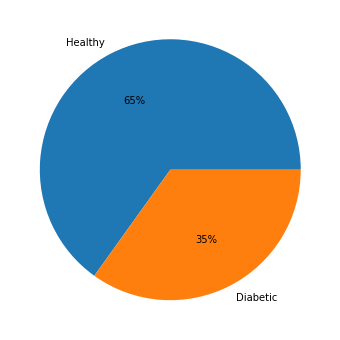

In [23]:
# Is data balanced?
plt.figure(figsize=(6,6))
labels = ['Healthy','Diabetic']
values = [df.Outcome.value_counts()[0], df.Outcome.value_counts()[1]]
plt.pie(values, labels=labels,autopct = '%0.0f%%')
plt.show()

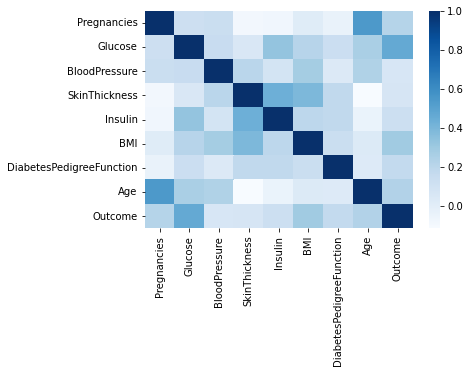

In [24]:
# Correlation
sns.heatmap(df.corr(),cmap='Blues',annot=False)

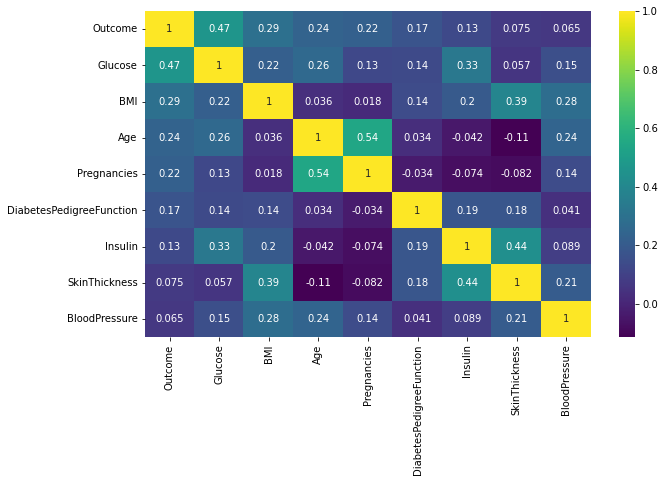

In [25]:
#Outcome correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


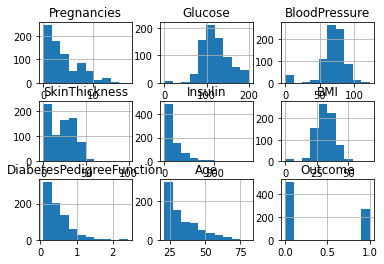

In [38]:
# How the data is distributed.
fig, ax = plt.subplots()
df.hist(figsize = (15,15),ax=ax,)
fig.savefig('featureHist.png',dpi=120)
run.log(
        {
            "FeaturesHist": wandb.Image("featureHist.png")
        }
        )

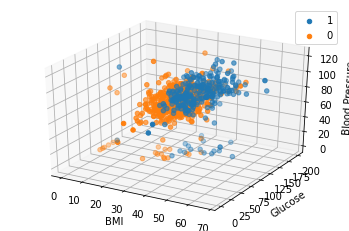

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.Outcome.unique():
    ax.scatter(df.BMI[df.Outcome==s],df.Glucose[df.Outcome==s],df.BloodPressure[df.Outcome==s],label=s)
ax.legend()
ax.set_xlabel('BMI')
ax.set_ylabel('Glucose')
ax.set_zlabel('Blood Pressure')

ax.figure.savefig('BMIxGlucosexBloodPressure.png')
run.log(
        {
            "BMIxGlucosexBloodPressure": wandb.Image("BMIxGlucosexBloodPressure.png")
        }
        )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

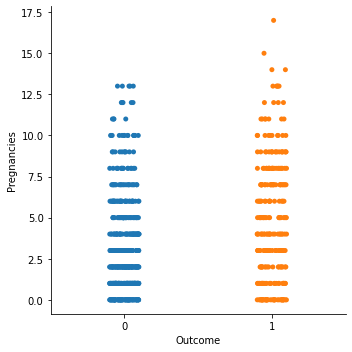

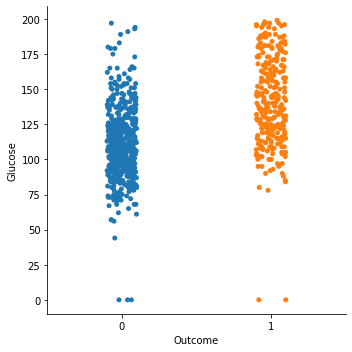

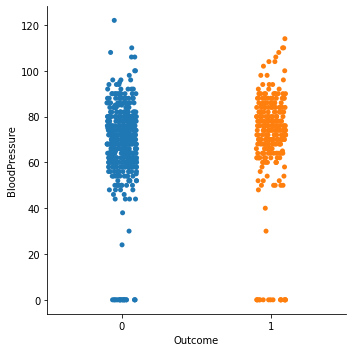

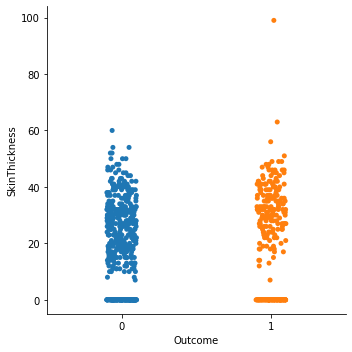

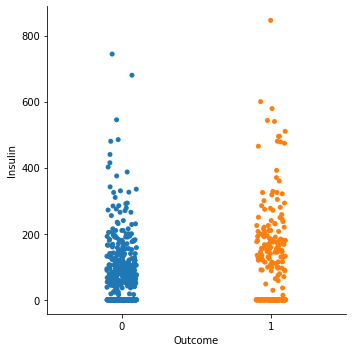

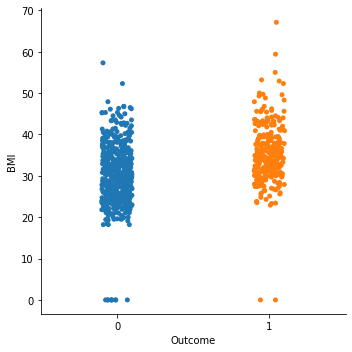

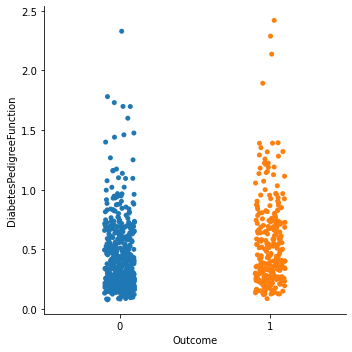

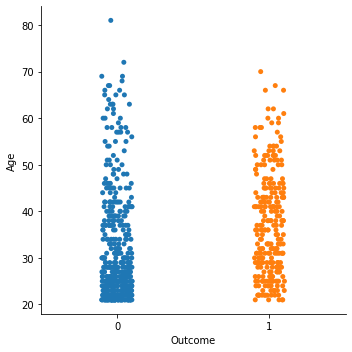

In [28]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
run.finish()